# Read Data from the Doppler Lidar

In [175]:
import glob
import utils
import xarray as xr
import pandas as pd
from datetime import datetime, timedelta
from datetime import datetime
import hvplot.xarray
import holoviews as hv

## Compile a list of data files

In [176]:
files = sorted(glob.glob('../../data/scanning-doppler-lidar/*'))

## Create helper functions to read in the data

In [220]:
def convert_to_hours_minutes_seconds(decimal_hour, initial_time):
    delta = timedelta(hours=decimal_hour)
    return datetime(initial_time.year, initial_time.month, initial_time.day) + delta

def read_as_netcdf(file):
    field_dict = utils.hpl2dict(file)
    initial_time = pd.to_datetime(field_dict['start_time'])

    time = pd.to_datetime([convert_to_hours_minutes_seconds(x, initial_time) for x in field_dict['decimal_time']])

    ds = xr.Dataset(coords={'range':field_dict['center_of_gates'],
                            'time': time,
                            'azimuth': ('time', field_dict['azimuth'])},
                    data_vars={'radial_velocity':(['range', 'time'],
                                                  field_dict['radial_velocity']),
                               'beta': (('range', 'time'), 
                                        field_dict['beta']),
                               'intensity': (('range', 'time'),
                                             field_dict['intensity'])
                              }
                   )
    return ds

## Read in the datasets and merge into a single dataset

In [221]:
datasets = [read_as_netcdf(file) for file in files]

In [222]:
datasets

[<xarray.Dataset>
 Dimensions:          (range: 133, time: 13)
 Coordinates:
   * range            (range) float64 12.0 36.0 60.0 ... 3.156e+03 3.18e+03
   * time             (time) datetime64[ns] 2022-12-08T15:05:47.699988 ... 202...
     azimuth          (time) float64 0.01 360.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0
 Data variables:
     radial_velocity  (range, time) float64 0.4969 0.2675 0.344 ... 0.3058 -13.49
     beta             (range, time) float64 7.989e-06 2.779e-05 ... -7.794e-07
     intensity        (range, time) float64 1.142 1.493 1.455 ... 1.517 0.9974,
 <xarray.Dataset>
 Dimensions:          (range: 133, time: 13)
 Coordinates:
   * range            (range) float64 12.0 36.0 60.0 ... 3.156e+03 3.18e+03
   * time             (time) datetime64[ns] 2022-12-08T15:15:48.200004 ... 202...
     azimuth          (time) float64 0.01 360.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0
 Data variables:
     radial_velocity  (range, time) float64 0.4586 0.4586 0.1529 ... 6.039 1.796
     beta     

In [223]:
ds = xr.concat(datasets, dim='time')

In [215]:
(ds.radial_velocity.hvplot(clim=(-5, 5), cmap='seismic') + ds.intensity.hvplot(cmap='magma', clim=(0, 4))).cols(1)

:Layout
   .Image.I  :Image   [time,range]   (radial_velocity)
   .Image.II :Image   [time,range]   (intensity)

In [202]:
ds.beta.max()

<xarray.DataArray 'beta' ()>
array(0.00075305)

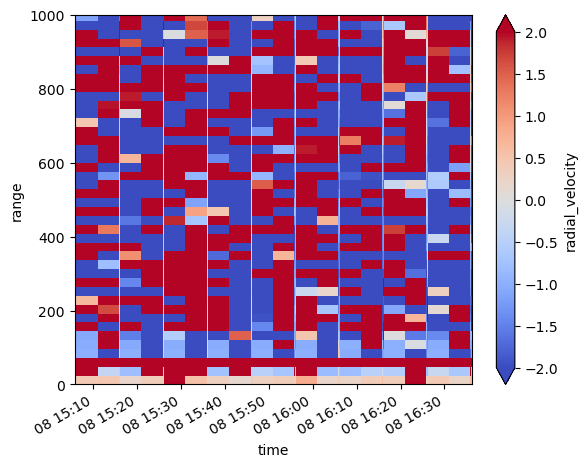

In [169]:
ds.radial_velocity.plot(ylim=(0, 1000), vmin=-2, vmax=2, cmap='coolwarm')

In [169]:
def convert_to_hours_minutes_seconds(decimal_hour, initial_time=initial_time):
    delta = timedelta(hours=decimal_hour)
    return datetime(initial_time.year, initial_time.month, initial_time.day) + delta



In [164]:
from datetime import timedelta

In [166]:
initial_time + timedelta(hours=72.345)

Timestamp('2022-12-11 15:26:30.230000')

In [170]:
pd.to_datetime("%d:%02d.%02.6f" % (hours, minutes, seconds))

NameError: name 'hours' is not defined

In [171]:
"%02.6f" % 7.329996000000392

'7.329996'

In [172]:
pd.to_datetime(['2022-12-08 15:05.47'])

DatetimeIndex(['2022-12-08 15:05:28'], dtype='datetime64[ns]', freq=None)

In [175]:
time

DatetimeIndex(['2022-12-08 15:05:47.699988', '2022-12-08 15:05:49.340004',
               '2022-12-08 15:05:50.970012', '2022-12-08 15:05:52.609992',
               '2022-12-08 15:05:54.250008', '2022-12-08 15:05:55.880016',
               '2022-12-08 15:05:57.519996', '2022-12-08 15:05:59.150004',
               '2022-12-08 15:06:00.780012', '2022-12-08 15:06:02.419992',
               '2022-12-08 15:06:04.060008', '2022-12-08 15:06:05.690016',
               '2022-12-08 15:06:07.329996'],
              dtype='datetime64[ns]', freq=None)

In [35]:
field_dict['spectral_width'].shape

(133, 13)

In [36]:
field_dict['center_of_gates'].shape

(133,)

In [191]:
field_dict

{'filename': 'RHI_240_20221208_150544.hpl',
 'system_id': 240,
 'number_of_gates': 133,
 'range_gate_length_m': 24.0,
 'gate_length_pts': 8,
 'pulses_per_ray': 5000,
 'number_of_waypoints_in_file': 13,
 'no_of_rays_in_file': 13,
 'scan_type': 'RHI',
 'focus_range': '65535',
 'start_time': '20221208 15:05:48.23',
 'resolution': '0.0382 m s-1',
 'range_gates': array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
         13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
         26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
         39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
         52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
         65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
         78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
         91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
        104, 105, 106, 107, 108, 109, 110, 111, 112, 113

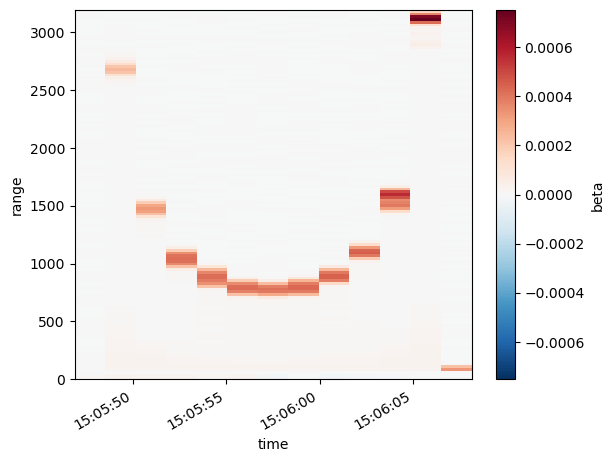

In [204]:
ds.beta.plot(x='time');

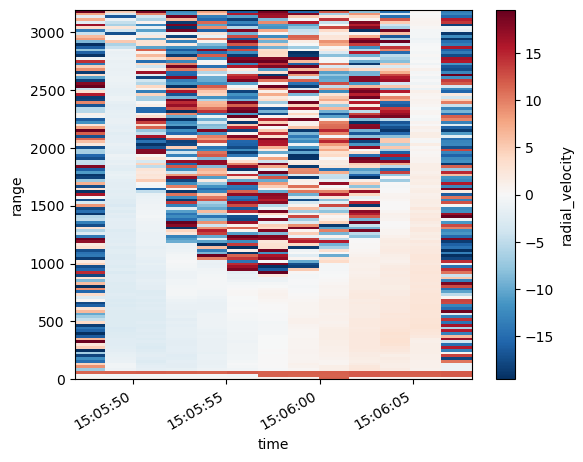

In [202]:
ds.radial_velocity.plot(x='time');

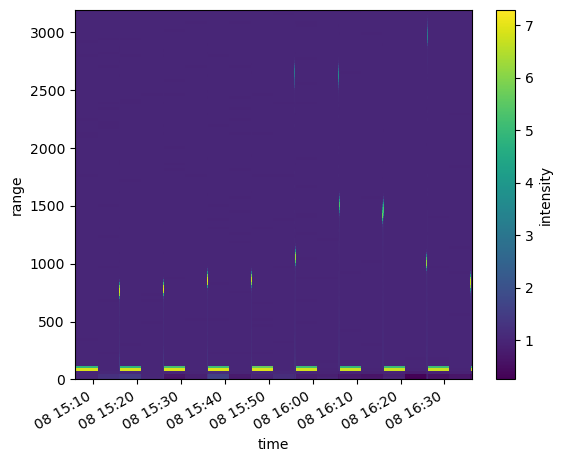

In [152]:
ds.intensity.plot()

In [25]:
xr.Dataset(field_dict)

MissingDimensionsError: cannot set variable 'radial_velocity' with 2-dimensional data without explicit dimension names. Pass a tuple of (dims, data) instead.

In [8]:
utils.hpl_to_netcdf(files[0], 'sample_file.nc')

sample_file.nc/2022/202212/20221208/RHI_240_20221208_150544_l0.nc is created succesfully


In [9]:
import xarray as xr

In [44]:
ds = xr.open_dataset('sample_file.nc/2022/202212/20221208/RHI_240_20221208_150544_l0.nc')

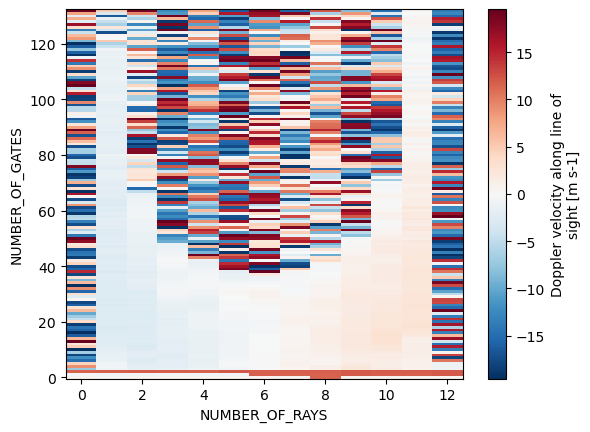

In [46]:
ds = ds.set_coords('decimal_time')
ds.radial_velocity.plot()

In [49]:
ds.decimal_time.values

array([15.09658333, 15.09703889, 15.09749167, 15.09794722, 15.09840278,
       15.09885556, 15.09931111, 15.09976389, 15.10021667, 15.10067222,
       15.10112778, 15.10158056, 15.10203611])